# Text detection and recogizer using Azure 
## Install depandancies

In [1]:
!pip install azure-ai-formrecognizer --pre
!pip installopencv-python
!pip install matplotlib

## Import Packages

In [4]:
import cv2
import matplotlib.pyplot as plt
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
from shapely.geometry import Polygon

## Insialize Azure endpoint and Key 

In [2]:
endpoint = "Enter Azure Endpoint"
key = "Enter Azure Key"

Document contains content:  KINGDOM OF SAUDI ARABIA
PASSPORT جواز سفر
المملكة العربية السعودية
Type
P
Country Code
SAU
Passport No.
F157966
الاسم/ إبراهيم بن عبدالله بن سلامه الحويطى
رقم الجواز /
Name/
ALHUWITI, IBRAHEM ABDULLAH S
Date of Birth
Sex *
الجنس
تاريخ الميلاد ١٤٠٥/١٢/٢٨ تاريخ الإصدار
13 Sep 1985
M
ذكر
Date of Issue
Date of Expiry
تاريخ الانتهاء
24 Apr 2004
02 Mar 2009
١٤٣٠/٠٣/٠٥
١٤٢٥/٠٣/٠٥
Issuing Authority TABOUK مكان الإصدار / تبوك
P<SAUALHUWITI << IBRAHEM<ABDULLAH<S <<<<<<<<<<< F157966 << 7SAU8509130M0903020 <<<<<<<<<<<<<< 06
----Analyzing Read from page #1----
Page has width: 1440.0 and height: 1080.0, measured with unit: pixel
...Line # 0 has text content 'KINGDOM OF SAUDI ARABIA' within bounding box '(172.0, 80.0), (681.0, 77.0), (682.0, 115.0), (172.0, 118.0), (172.0, 80.0)'
...Line # 1 has text content 'PASSPORT' within bounding box '(157.0, 196.0), (313.0, 196.0), (313.0, 227.0), (157.0, 227.0), (157.0, 196.0)'
...Line # 2 has text content 'جواز سفر' within bounding

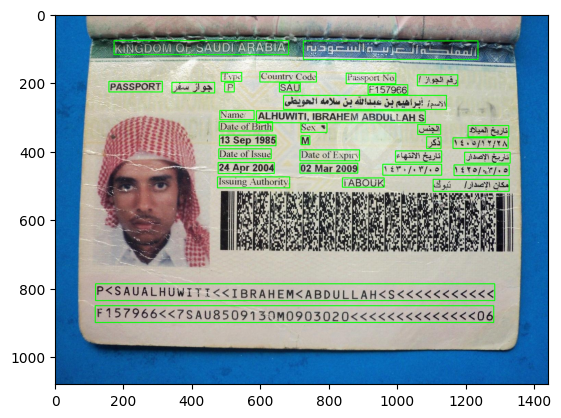

In [39]:
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
from shapely.geometry import Polygon

# Initialize the main function that takes the image path and output text files
def analyze_read(image_path, output_file):
    # Path to the local image file
    document_path = image_path
    
    # Access Azure API using key and Endpoints
    document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )
    
    # Read the image
    img = cv2.imread(image_path)
    points = []  # Initialize an empty list to store lists of polygon points
    
    def format_polygon(polygon):
        """Format polygon coordinates for display."""
        formatted_polygon = ""
        polygon_obj = Polygon(polygon)  # Convert list to polygon object
        for point in polygon_obj.exterior.coords:
            formatted_polygon += f"({point[0]}, {point[1]}), "
        return formatted_polygon[:-2]  # Remove trailing comma and space

    with open(document_path, "rb") as image_file:
        poller = document_analysis_client.begin_analyze_document(
            "prebuilt-read", image_file
        )
        result = poller.result()

    print("Document contains content: ", result.content)

    with open(output_file, 'w', encoding='utf-8') as file:
        for idx, style in enumerate(result.styles):
            print(
                "Document contains {} content".format(
                    "handwritten" if style.is_handwritten else "no handwritten"
                )
            )

        for page in result.pages:
            print("----Analyzing Read from page #{}----".format(page.page_number))
            print(
                "Page has width: {} and height: {}, measured with unit: {}".format(
                    page.width, page.height, page.unit
                )
            )

            for line_idx, line in enumerate(page.lines):
                points.append([])  # Append a new empty list for each line
                points[line_idx].extend(line.polygon)  # Extend the points list with line polygon
                text = line.content
                file.write(text + '\n')
                print(
                    "...Line # {} has text content '{}' within bounding box '{}'".format(
                        line_idx,
                        line.content,
                        format_polygon(line.polygon),
                    )
                )
                
                # Draw rectangle around the detected text
                polygon = [(int(x), int(y)) for x, y in line.polygon]
                top_left = (min(polygon, key=lambda x: x[0])[0], min(polygon, key=lambda x: x[1])[1])
                bottom_right = (max(polygon, key=lambda x: x[0])[0], max(polygon, key=lambda x: x[1])[1])
                cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

            for word in page.words:
                print(
                    "...Word '{}' has a confidence of {}".format(
                        word.content, word.confidence
                    )
                )

    print("----------------------------------------")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    return "Done"

if __name__ == "__main__":
    # Specify the path to the local image file
    image_path = "../Images/saudi Passport.jpg"
    output_file = 'Text.txt'
    analyze_read(image_path, output_file)

Document contains content:  GW1346493
محم ◌ُودَ يَّة ◌َصَر العَربيَةْ بطاقة تحقيق الشخصية
أحمد
خالد محمد على
كلا حين ابنود مركز قنا - قنا
٥٢ ٠١٦ ٢٧ ١٠ ١٠ ٢٩٠
----Analyzing Read from page #1----
Page has width: 640.0 and height: 640.0, measured with unit: pixel
...Line # 0 has text content 'GW1346493' within bounding box '(53.0, 564.0), (203.0, 563.0), (203.0, 604.0), (53.0, 605.0), (53.0, 564.0)'
...Line # 1 has text content 'محم ◌ُودَ يَّة ◌َصَر العَربيَةْ' within bounding box '(276.0, 11.0), (536.0, 1.0), (539.0, 66.0), (279.0, 80.0), (276.0, 11.0)'
...Line # 2 has text content 'بطاقة تحقيق الشخصية' within bounding box '(323.0, 79.0), (494.0, 69.0), (497.0, 113.0), (323.0, 124.0), (323.0, 79.0)'
...Line # 3 has text content 'أحمد' within bounding box '(557.0, 155.0), (606.0, 152.0), (608.0, 186.0), (558.0, 188.0), (557.0, 155.0)'
...Line # 4 has text content 'خالد محمد على' within bounding box '(450.0, 213.0), (606.0, 206.0), (610.0, 253.0), (450.0, 265.0), (450.0, 213.0)'
...Line # 

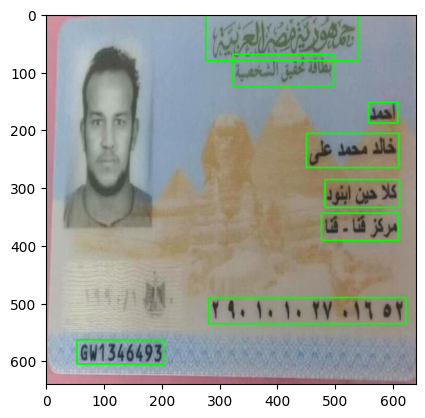

In [40]:
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
from shapely.geometry import Polygon

# Initialize the main function that takes the image path and output text files
def analyze_read(image_path, output_file):
    # Path to the local image file
    document_path = image_path
    
    # Access Azure API using key and Endpoints
    document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )
    
    # Read the image
    img = cv2.imread(image_path)
    points = []  # Initialize an empty list to store lists of polygon points
    
    def format_polygon(polygon):
        """Format polygon coordinates for display."""
        formatted_polygon = ""
        polygon_obj = Polygon(polygon)  # Convert list to polygon object
        for point in polygon_obj.exterior.coords:
            formatted_polygon += f"({point[0]}, {point[1]}), "
        return formatted_polygon[:-2]  # Remove trailing comma and space

    with open(document_path, "rb") as image_file:
        poller = document_analysis_client.begin_analyze_document(
            "prebuilt-read", image_file
        )
        result = poller.result()

    print("Document contains content: ", result.content)

    with open(output_file, 'w', encoding='utf-8') as file:
        for idx, style in enumerate(result.styles):
            print(
                "Document contains {} content".format(
                    "handwritten" if style.is_handwritten else "no handwritten"
                )
            )

        for page in result.pages:
            print("----Analyzing Read from page #{}----".format(page.page_number))
            print(
                "Page has width: {} and height: {}, measured with unit: {}".format(
                    page.width, page.height, page.unit
                )
            )

            for line_idx, line in enumerate(page.lines):
                points.append([])  # Append a new empty list for each line
                points[line_idx].extend(line.polygon)  # Extend the points list with line polygon
                text = line.content
                file.write(text + '\n')
                print(
                    "...Line # {} has text content '{}' within bounding box '{}'".format(
                        line_idx,
                        line.content,
                        format_polygon(line.polygon),
                    )
                )
                
                # Draw rectangle around the detected text
                polygon = [(int(x), int(y)) for x, y in line.polygon]
                top_left = (min(polygon, key=lambda x: x[0])[0], min(polygon, key=lambda x: x[1])[1])
                bottom_right = (max(polygon, key=lambda x: x[0])[0], max(polygon, key=lambda x: x[1])[1])
                cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

            for word in page.words:
                print(
                    "...Word '{}' has a confidence of {}".format(
                        word.content, word.confidence
                    )
                )

    print("----------------------------------------")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    return "Done"

if __name__ == "__main__":
    # Specify the path to the local image file
    image_path = "../Images/Egyptian National Id.jpg"
    output_file = 'Text.txt'
    analyze_read(image_path, output_file)

Document contains content:  محم هُوُ السَّ مْضِ العَرَمْ
يشمل هذا الجواز ٥٢ صفحة This Passport contains 52 Pages ARAB REPUBLIC OF EGYPT
EGYPT ARAB REPUBLIC OF
ورية مصر العربية ARA 3 REPUBLIC OF
رقم الجواز / Passport No رمزالتد / Countrycode النوع / Type P EGY JA425381826 ١ لإسم
الهام ابراهيم حنفى الأزهرى
Full Name
ELHAM IBRAHIM HANAFI ELAZHARÝ
Nationality
Sex
النوع
الجنسية
EGYPTIAN
F
أنتى
مصرية
Date of Issue
Date of Expiry:
تاريخ الإصدار تاريخ الإنتهاء:
18/08/2019 17/08/2026
٢٠١٩/٠٨/١٨ ٢٠٢٦/٠٨/١٧
Issuing Office
جهة إصدار الجواز
2
١٩٤٦/٠٥/٠٦ Date Of Birth Place Of Birth مكان الميلاد تاريخ الميلاد 06/05/1946 CAIRO القاهرة
الرقم القومى: ٢٤٦٠٥٠٦٠١٠١٥٠٧ الوظيفة / المهنة : -
Profession: -
العنوان: ٥٤ش الشهيد فريد سميكه -م . الحجاز - النزهة
P<EGYELAZHARY << ELHAM<IBRAHIM<HAN <<<<<<<<<<<< A253818265EGY4605067F2608178 <<<<<<<<<<<<<< 04
----Analyzing Read from page #1----
Page has width: 1262.0 and height: 1628.0, measured with unit: pixel
...Line # 0 has text content 'محم هُوُ السَّ مْضِ العَرَ

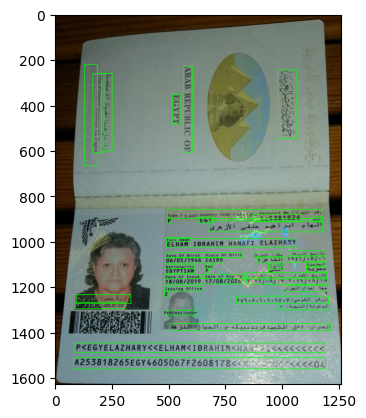

In [5]:
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
from shapely.geometry import Polygon

# Initialize the main function that takes the image path and output text files
def analyze_read(image_path, output_file):
    # Path to the local image file
    document_path = image_path
    
    # Access Azure API using key and Endpoints
    document_analysis_client = DocumentAnalysisClient(
        endpoint=endpoint, credential=AzureKeyCredential(key)
    )
    
    # Read the image
    img = cv2.imread(image_path)
    points = []  # Initialize an empty list to store lists of polygon points
    
    def format_polygon(polygon):
        """Format polygon coordinates for display."""
        formatted_polygon = ""
        polygon_obj = Polygon(polygon)  # Convert list to polygon object
        for point in polygon_obj.exterior.coords:
            formatted_polygon += f"({point[0]}, {point[1]}), "
        return formatted_polygon[:-2]  # Remove trailing comma and space

    with open(document_path, "rb") as image_file:
        poller = document_analysis_client.begin_analyze_document(
            "prebuilt-read", image_file
        )
        result = poller.result()

    print("Document contains content: ", result.content)

    with open(output_file, 'w', encoding='utf-8') as file:
        for idx, style in enumerate(result.styles):
            print(
                "Document contains {} content".format(
                    "handwritten" if style.is_handwritten else "no handwritten"
                )
            )

        for page in result.pages:
            print("----Analyzing Read from page #{}----".format(page.page_number))
            print(
                "Page has width: {} and height: {}, measured with unit: {}".format(
                    page.width, page.height, page.unit
                )
            )

            for line_idx, line in enumerate(page.lines):
                points.append([])  # Append a new empty list for each line
                points[line_idx].extend(line.polygon)  # Extend the points list with line polygon
                text = line.content
                file.write(text + '\n')
                print(
                    "...Line # {} has text content '{}' within bounding box '{}'".format(
                        line_idx,
                        line.content,
                        format_polygon(line.polygon),
                    )
                )
                
                # Draw rectangle around the detected text
                polygon = [(int(x), int(y)) for x, y in line.polygon]
                top_left = (min(polygon, key=lambda x: x[0])[0], min(polygon, key=lambda x: x[1])[1])
                bottom_right = (max(polygon, key=lambda x: x[0])[0], max(polygon, key=lambda x: x[1])[1])
                cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

            for word in page.words:
                print(
                    "...Word '{}' has a confidence of {}".format(
                        word.content, word.confidence
                    )
                )

    print("----------------------------------------")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    return "Done"

if __name__ == "__main__":
    # Specify the path to the local image file
    image_path = "./egy passport.jpg"
    output_file = 'Text.txt'
    analyze_read(image_path, output_file)